## 결정트리(Decision Tree)

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

In [11]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, test_size=0.2, random_state=156
)

In [13]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- 모델 시각화

In [16]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, out_file='tree.dot',
    feature_names=iris.feature_names, class_names = iris.target_names,
    impurity=True, filled=True
)

In [ ]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
src = graphviz.Source(dot_graph)
src

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

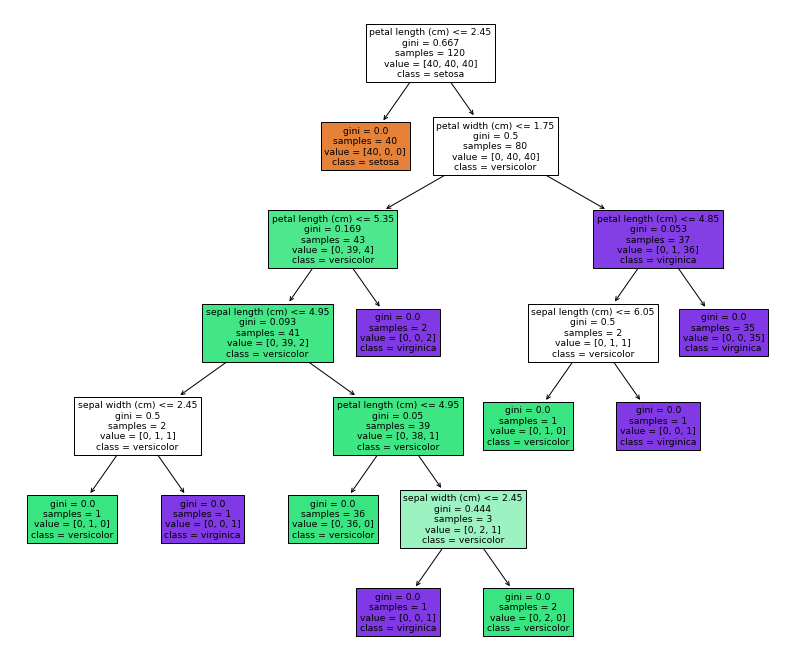

In [19]:
plt.figure(figsize=(14,12))
plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names, filled = True)
plt.show()

### 제약조건
- max_depth=3

In [20]:
dtc2 = DecisionTreeClassifier(max_depth = 3, random_state=156)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [21]:
export_graphviz(
    dtc2, out_file='tree2.dot',
    feature_names=iris.feature_names, class_names = iris.target_names,
    impurity=True, filled=True
)

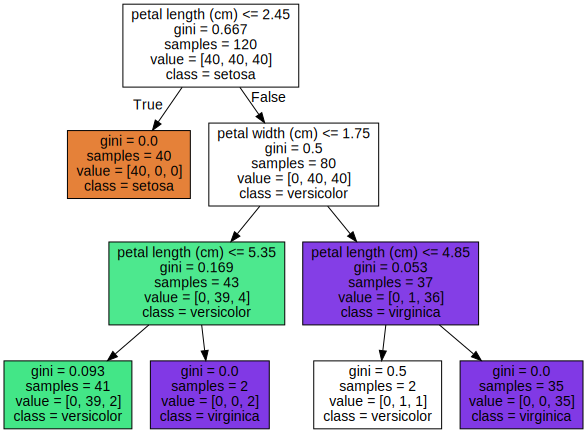

In [22]:
with open('tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


- min_samples_split = 4

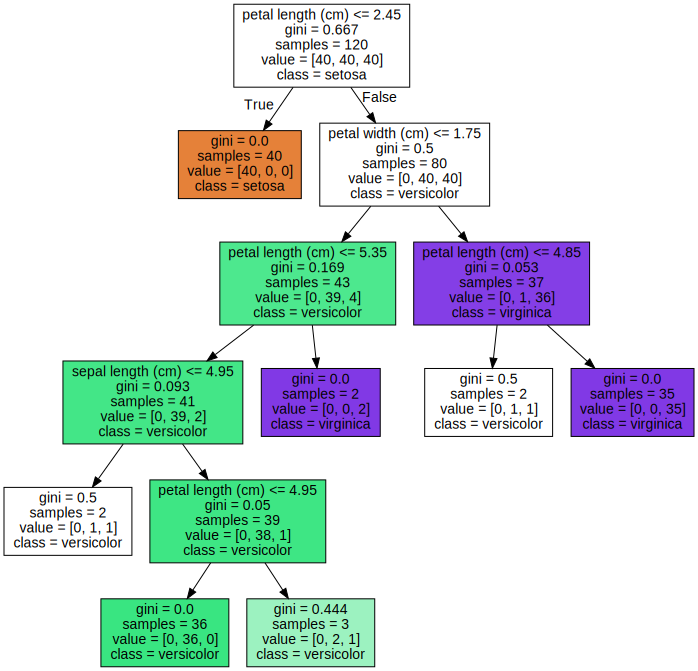

In [23]:
dtc3 = DecisionTreeClassifier(min_samples_split = 4, random_state=156)
dtc3.fit(X_train, y_train)
export_graphviz(
    dtc3, out_file='tree3.dot',
    feature_names=iris.feature_names, class_names = iris.target_names,
    impurity=True, filled=True
)
with open('tree3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


- min_samples_leaf = 2

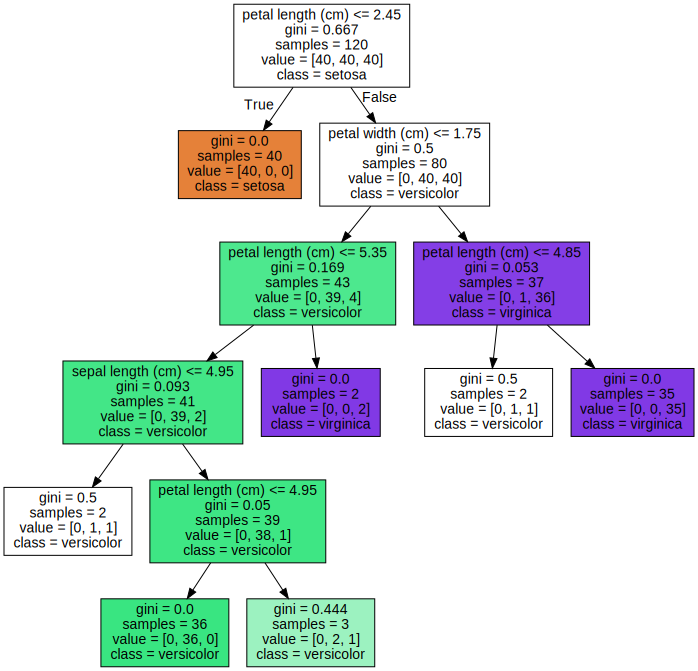

In [24]:
dtc4 = DecisionTreeClassifier(min_samples_leaf = 2, random_state=156)
dtc4.fit(X_train, y_train)
export_graphviz(
    dtc4, out_file='tree4.dot',
    feature_names=iris.feature_names, class_names = iris.target_names,
    impurity=True, filled=True
)
with open('tree4.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


- 모델 비교

In [25]:
dtc.score(X_test, y_test), dtc2.score(X_test, y_test), dtc3.score(X_test, y_test), dtc4.score(X_test, y_test)

(0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333)

### 학습된 모델이 제공하는 정보

- Feature importance

In [26]:
dtc.feature_importances_

array([0.023202  , 0.02916667, 0.56265333, 0.384978  ])

In [27]:
dtc2.feature_importances_

array([0.        , 0.        , 0.59042237, 0.40957763])

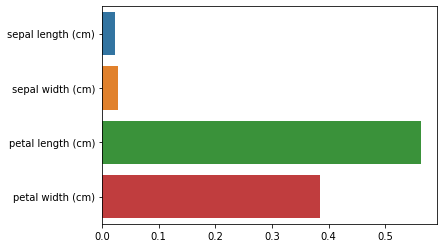

In [28]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
plt.show()